5. Find a geometrically optimized wind farm layout for the areas N-9.1, N-9.2 and N-9.3 using FOXES (you can use the 
provided material for reference but we want to see the code).  
6. Calculate the yield of the areas N-9.1, N-9.2, N-9.3 without external effects. Use the long-term corrected ERA5 data as 
input.  
7. Use three other FOXES setups of your choice (wake models) to calculate the yield again and plot the differences. Explain 
your results. 
8. Pick one of your four FOXES setups. Next, run a FOXES simulation for all existing and future wind farms. Calculate the 
energy yield of your wind farm under the influence of both internal and external wakes. 
9. Derive  the  wake  losses.  This  is,  in  percentage,  the  yield  you  lose  due  to  the  wake  effect, relative  to  the  theoretical 
situation in which no wakes would occur. Estimate what part can be allocated to external wake effects (other wind 
farms), and what part can be allocated to internal wake effects (the wind farm itself).

In [1]:
# Data Paths
lidar_path = 'data/measurements/'
era5_path = 'data/reanalysis/'
turbines_existing_path = 'data/turbine-info/coordinates/existing/'
turbines_planned_future_path = 'data/turbine-info/coordinates/planned_future/'
turbines_planned_in_operation_before_2030_path = 'data/turbine-info/coordinates/planned_in_operation_before_2030/'
turbines_planned_netherlands_path = 'data/turbine-info/coordinates/planned_netherlands/'
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
shapefiles_DEU_path = 'data/shapefiles/DEU/*'
shapefiles_DNK_path = 'data/shapefiles/DNK/*'
shapefiles_NLD_path = 'data/shapefiles/NLD/*'
turbine_power_curves_path = 'data/turbine-info/power_curves/'

In [2]:
import os
import numpy as np
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import foxes
import foxes.variables as FV
import foxes.constants as FC
import foxes.opt.problems.layout.geom_layouts as grg# Purely geometrical layout problems (wake effects are not evaluated).
from iwopy.interfaces.pymoo import Optimizer_pymoo        # some optimization Package idk
import geopandas as gpd



# Function to read and extract data from netcdf files
def read_netcdf(path):
    data = nc.Dataset(path, 'r')
    return data

# Function to read and extract data from csv files
def read_csv(path):
    data = pd.read_csv(path)
    return data

### Example and external turbines
- to compare our layout to
- faktor in external wake effects


Turbine 0, T0: 
Turbine 1, T1: 
Turbine 2, T2: 
Turbine 3, T3: 
Turbine 4, T4: 
Turbine 5, T5: 
Turbine 6, T6: 
Turbine 7, T7: 
Turbine 8, T8: 
Turbine 9, T9: 
Turbine 10, T10: 
Turbine 11, T11: 
Turbine 12, T12: 
Turbine 13, T13: 
Turbine 14, T14: 
Turbine 15, T15: 
Turbine 16, T16: 
Turbine 17, T17: 
Turbine 18, T18: 
Turbine 19, T19: 
Turbine 20, T20: 
Turbine 21, T21: 
Turbine 22, T22: 
Turbine 23, T23: 
Turbine 24, T24: 
Turbine 25, T25: 
Turbine 26, T26: 
Turbine 27, T27: 
Turbine 28, T28: 
Turbine 29, T29: 
Turbine 30, T30: 
Turbine 31, T31: 
Turbine 32, T32: 
Turbine 33, T33: 
Turbine 34, T34: 
Turbine 35, T35: 
Turbine 36, T36: 
Turbine 37, T37: 
Turbine 38, T38: 
Turbine 39, T39: 
Turbine 40, T40: 
Turbine 41, T41: 
Turbine 42, T42: 
Turbine 43, T43: 
Turbine 44, T44: 
Turbine 45, T45: 
Turbine 46, T46: 
Turbine 47, T47: 
Turbine 48, T48: 
Turbine 49, T49: 
Turbine 50, T50: 
Turbine 51, T51: 
Turbine 52, T52: 
Turbine 53, T53: 
Turbine 54, T54: 
Turbine 55, T55: 
Turbine 56, 

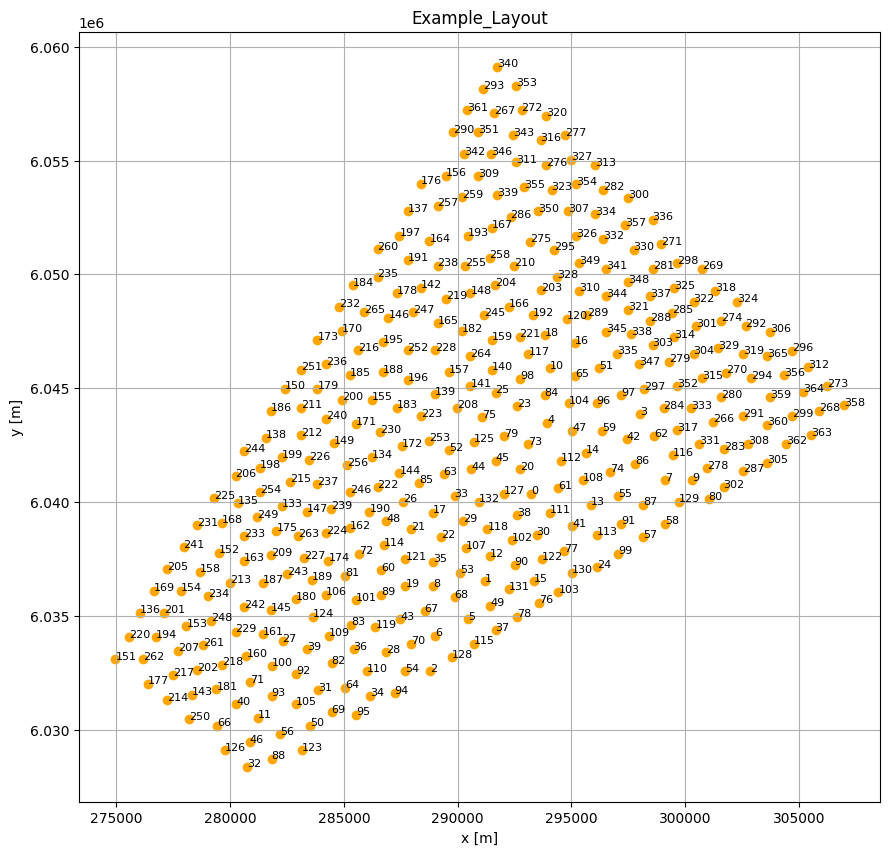

In [3]:

current_path =  turbines_area_of_interest_path
#current_path = turbines_existing_path
#current_path = turbines_planned_future_path
#current_path = turbines_planned_in_operation_before_2030_path
#current_path = turbines_planned_netherlands_path

# get the name of files in dir
turb_files = os.listdir(current_path)
# read files in path to dataframe and put's those in list 
dfs = [read_csv(current_path + file) for file in turb_files] #read files in path to dataframe and put's those in list 

farm = foxes.WindFarm(name="Example_Layout")
for dataframes in dfs:
     foxes.input.farm_layout.add_from_df(farm, dataframes) # also prints Turbines 'Turbine 0, T0: ' :(


# plot  with foxes
ax = foxes.output.FarmLayoutOutput(farm).get_figure(figsize=(17, 10))
plt.show()

In [4]:
# smalles distance between 2 points
import math
from itertools import combinations

def smallest_distance(points):
    return min(math.dist(p1, p2) for p1, p2 in combinations(points, 2))
#print(np.array(dfs[0][["x","y"]]))
dis = smallest_distance(
    np.array(dfs[0][["x","y"]])
    )
print(dis)
## with D=240 for the turbines in this example, the min. distance is ~ 4*D 

967.470929795826


### Layout Generation

In [5]:
import foxes.opt.problems.layout.geom_layouts as grg      # Purely geometrical layout problems (wake effects are not evaluated).
# to include Wake effect look up: https://fraunhoferiwes.github.io/foxes.docs/api_opt_problems.html#foxes-opt-problems-layout

from iwopy.interfaces.pymoo import Optimizer_pymoo        # some optimization Package idk
import geopandas as gpd

In [6]:
# No influenz from Wind conditions, just geometric Data

# 1. Create geo. boundary
#area_shp = gpd.read_file('data/shapefiles/FEP2024_PreDraft/area.shp')
#expansion_area_consideration_shp = gpd.read_file('data/shapefiles/FEP2024_PreDraft/expansion_area_under_consideration.shp')
#other_energy_generation_shp = gpd.read_file('data/shapefiles/FEP2024_PreDraft/otherenergygeneration.shp')
#possible_expansion_shp = gpd.read_file('data/shapefiles/FEP2024_PreDraft/possible_expansion_area.shp')
site_shp = gpd.read_file('data/shapefiles/FEP2024_PreDraft/site.shp')
df_n91 = site_shp[site_shp['name_fep']=='N-9.1']

#print(type(site_shp[site_shp['name_fep']=='N-9.1']))
#print((site_shp[site_shp['name_fep']=='N-9.1']).shape)

print(np.array(df_n91.get_coordinates()))
boundary = foxes.utils.geom2d.ClosedPolygon(
    np.array(df_n91.get_coordinates())
    ) # put the coords of N9.1 into foxes-boundary as an np.array

[[4037217.674381  3480275.087553 ]
 [4034831.0394465 3482291.700966 ]
 [4050887.351522  3500481.6654685]
 [4057170.143415  3492259.3994785]
 [4037217.674381  3480275.087553 ]]


[Foxes](https://fraunhoferiwes.github.io/foxes.docs/index.html)

In [7]:

# 2. The so-called optimization problem defines the variables that the optimizer will vary later.
#  Here it is a regular grid of points, whose origin, grid spacing and rotation agains the x-axis are the optimization variables:

D = 100 # the rotor diameter

# Farm layout turbine positioning problems. (No Wake)
# GeomLayout        ##  A layout within a boundary geometry, purely defined by geometrical optimization (no wakes).
# GeomRegGrid       ##  A regular grid within a boundary geometry.
# GeomLayoutGridded ##  A layout within a boundary geometry, purely defined by geometrical optimization (no wakes), on a fixes background point grid.
# GeomRegGrids      ##  A regular grid within a boundary geometry.

problem = grg.GeomLayout(
    boundary, 
    n_turbines=10,  # the number of turbines to be placed 
    min_dist=3*D,   # the minimal distance between turbines
    # n_grids = 10  # number of Grids for GeomRegGrids
    #D=D            # this avoids that rotor blades can reach out of area
)
### Opjectives may only apply the model withour wake effect
###  https://fraunhoferiwes.github.io/foxes.docs/api_opt_problems_geom.html#foxes-opt-problems-layout-geom-layouts-objectives

# problem.add_objective(grg.MaxDensity(problem, dfactor=2)) #objective function, which maximizes the grid spacing:
#problem.add_objective(grg.MaxDensity(problem)) #objective function, which maximizes the grid spacing:
problem.add_objective(grg.OMaxN(problem)) #objective function, which maximizes number of turbines
#problem.add_objective(grg.MeMiMaDist(problem)) #objective function, which maximizes number of turbines

# 3. Finally, we add a constraint that considers only valid layouts, for which exactly N points lie within the area. 
# Afterwards, the problem setup is complete and we can initialize it:
problem.add_constraint(grg.Valid(problem))
#problem.add_constraint(grg.CMinDensity(problem, min_value = 1))

problem.initialize()
#farm = foxes.WindFarm(name="my_farm")

Problem 'geom_reg_grids' (GeomLayout): Initializing
---------------------------------------------------
  n_vars_int  : 0
  n_vars_float: 20
---------------------------------------------------
  n_objectives: 1
  n_obj_cmptns: 1
---------------------------------------------------
  n_constraints: 1
  n_con_cmptns: 1
---------------------------------------------------


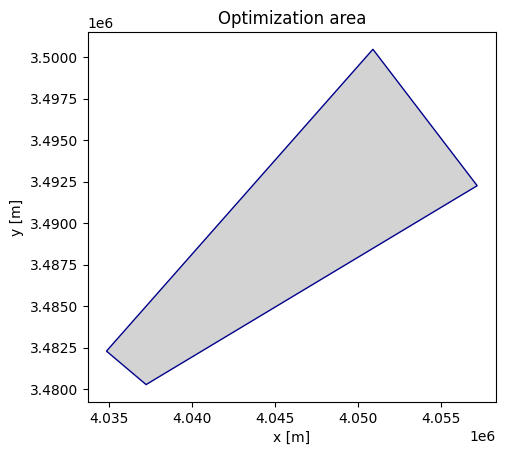

In [8]:
# This is what the wind farm area looks like:
problem.get_fig()
plt.show()

Next, we have to select an optimizer. Here we pick the Genetic algorithm from `pymoo`, called [GA](https://pymoo.org/algorithms/soo/ga.html):

In [9]:
solver = Optimizer_pymoo(
    problem,
    problem_pars=dict(vectorize=True),
    algo_pars=dict(
        type="GA",
        pop_size=500,  # the number of layouts per generation,  more Turbines require mor Layouts or we won't get a success
        seed=42,       # the random seed, for reproducible results
    ),
    setup_pars=dict(),
    term_pars=dict(n_gen=200),  # the number of generations 
)
solver.initialize()
solver.print_info()

Loading pymoo
pymoo successfully loaded
Initializing Optimizer_pymoo
Selecting sampling: float_random (FloatRandomSampling)
Selecting algorithm: GA (GA)

Problem:
--------
  vectorize: True

Algorithm:
----------
  type: GA
  pop_size: 500
  seed: 42

Termination:
------------
  n_gen: 200



In [10]:
# Now let's run the optimization:
results = solver.solve()
solver.finalize(results)

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |      500 |  2.0000000000 |  6.5500000000 |             - |             -
     2 |     1000 |  2.0000000000 |  5.0460000000 |             - |             -
     3 |     1500 |  1.0000000000 |  4.1480000000 |             - |             -
     4 |     2000 |  1.0000000000 |  3.4900000000 |             - |             -
     5 |     2500 |  0.000000E+00 |  3.0320000000 | -1.000000E+01 | -1.000000E+01
     6 |     3000 |  0.000000E+00 |  2.5920000000 | -1.000000E+01 | -1.000000E+01
     7 |     3500 |  0.000000E+00 |  2.2940000000 | -1.000000E+01 | -1.000000E+01
     8 |     4000 |  0.000000E+00 |  1.8620000000 | -1.000000E+01 | -1.000000E+01
     9 |     4500 |  0.000000E+00 |  1.6740000000 | -1.000000E+01 | -1.000000E+01
    10 |     5000 |  0.000000E+00 |  1.4820000000 | -1.000000E+01 | -1.000000E+01
    11 |     5500 |  0.000000E+00 |  1.1820000000 | -1.000000E+01 | -1.000000E+01
    12 |     600

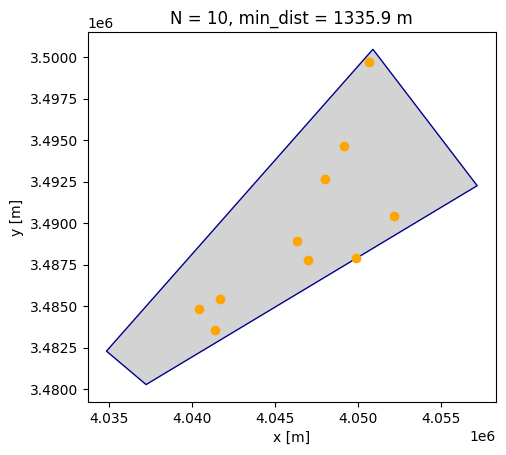

[[4052158.26203783 3490408.53452946]
 [4050650.13677327 3499716.71957098]
 [4041669.00057239 3485418.70435991]
 [4046285.10295821 3488957.57071833]
 [4047983.49952563 3492682.34481943]
 [4041381.96758591 3483560.93482448]
 [4040431.10211647 3484819.27979979]
 [4046973.25334741 3487812.49492559]
 [4049872.72745211 3487892.29934146]
 [4049165.49984986 3494672.33732406]]
              x             y
0  4.052158e+06  3.490409e+06
1  4.050650e+06  3.499717e+06
2  4.041669e+06  3.485419e+06
3  4.046285e+06  3.488958e+06
4  4.047983e+06  3.492682e+06
5  4.041382e+06  3.483561e+06
6  4.040431e+06  3.484819e+06
7  4.046973e+06  3.487812e+06
8  4.049873e+06  3.487892e+06
9  4.049165e+06  3.494672e+06


In [11]:
xy, valid = results.problem_results
problem.get_fig(xy, valid)
plt.show()

#The list of turbine coordinates is now stored as a numpy array under `xy`:
print(xy)
df = pd.DataFrame(xy, columns=['x','y'])
print(df)
df.to_csv("NoWake_Layout.csv", header=True, index=False)